In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

exps_dir = 'exps'

In [2]:
os.listdir(exps_dir)

['r50_deformable_detr_v1',
 'r50_deformable_detr_v1_infer',
 'r50_deformable_detr_v0']

In [3]:
result = {}
for exp_name in os.listdir(exps_dir):
    exp_log_fp = f'{exps_dir}/{exp_name}/log.txt'
    if os.path.exists(exp_log_fp):
        logs = pd.read_json(exp_log_fp, lines=True)[['test_coco_eval_bbox', 'epoch']]
        result[exp_name] = pd.DataFrame(logs['test_coco_eval_bbox'].to_list(), columns=['ap', 'ap50', 'ap75', 'aps', 'apm', 'apl', 'ar', 'ar50', 'ar75', 'ars', 'arm', 'arl'])

#result['r50_deformable_detr_v0']


In [4]:
def plot_performance(metric='ap', print_data=False):

    plot_data = {}
    for exp in result.keys():
        plot_data[exp] = result[exp][metric]
    plot_data = pd.DataFrame(plot_data)

    if print_data:
        print(plot_data)

    plot_data.plot()
    print(plot_data.max())

    return plt.show()

    r50_deformable_detr_v1  r50_deformable_detr_v0
0                 0.143751                0.136191
1                 0.166184                0.162217
2                 0.169229                0.203906
3                 0.188932                0.194968
4                 0.216981                0.216646
..                     ...                     ...
94                     NaN                0.406299
95                     NaN                0.405044
96                     NaN                0.406287
97                     NaN                0.406330
98                     NaN                0.406762

[99 rows x 2 columns]
r50_deformable_detr_v1    0.281573
r50_deformable_detr_v0    0.406762
dtype: float64


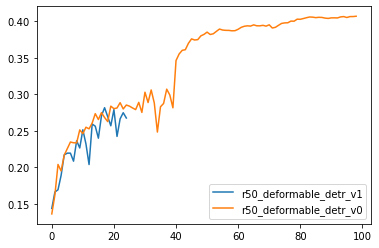

In [5]:
plot_performance('ap', print_data=True)

    r50_deformable_detr_v1  r50_deformable_detr_v0
0                 0.267048                0.261235
1                 0.307876                0.306098
2                 0.352653                0.358905
3                 0.348739                0.360947
4                 0.383584                0.375266
..                     ...                     ...
94                     NaN                0.621615
95                     NaN                0.621232
96                     NaN                0.622025
97                     NaN                0.621132
98                     NaN                0.622272

[99 rows x 2 columns]
r50_deformable_detr_v1    0.482909
r50_deformable_detr_v0    0.622272
dtype: float64


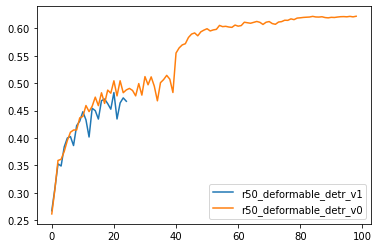

In [6]:
plot_performance('ap50', print_data=True)